# Tu primer random forest con scikit-learn

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

El objetivo principal es crear un modelo que prediga si un paciente tiene o no diabetes por medio de otras mediciones de salud.

In [2]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv('./pima-indians-diabetes_n.csv')
df_diabetes

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


## Exploración de datos

In [3]:
#Visualizacion del dataframe
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
278,2,108,62,10,278,25.3,0.881,22,0
378,0,93,100,39,72,43.4,1.021,35,0
409,6,102,90,39,0,35.7,0.674,28,0
203,6,103,72,32,190,37.7,0.324,55,0
697,4,127,88,11,155,34.5,0.598,28,0
599,1,108,88,19,0,27.1,0.400,24,0
397,3,82,70,0,0,21.1,0.389,25,0
396,0,131,66,40,0,34.3,0.196,22,1
40,7,133,84,0,0,40.2,0.696,37,0
222,7,142,60,33,190,28.8,0.687,61,0


In [4]:
#Renombramos las columnas
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [5]:
#Verificacion de datos
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [6]:
#Analizamos el shape del objeto
print(df_diabetes.shape)

(767, 9)


In [7]:
#Visualizamos los tipos de datos
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

In [8]:
# Cantidad de missing por variable
df_diabetes.isnull().sum()

1. Number of times pregnant                                                    0
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
3. Diastolic blood pressure (mm Hg)                                            0
4. Triceps skin fold thickness (mm)                                            0
5. 2-Hour serum insulin (mu U/ml)                                              0
6. Body mass index (weight in kg/(height in m)^2)                              0
7. Diabetes pedigree function                                                  0
8. Age (years)                                                                 0
9. Class variable (0 or 1)                                                     0
dtype: int64

## Entrenamiento de random forest con scikit-learn

In [9]:
#Separamos en X e y
X = df_diabetes.drop("9. Class variable (0 or 1)", axis =1)
y = df_diabetes["9. Class variable (0 or 1)"]

In [10]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=00000)

In [11]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)

n_estimators es un hiperparámetro que se utiliza en algoritmos de conjunto de árboles, como Random Forests y Gradient Boosting. Controla el número de árboles que se deben construir en el conjunto. Cada árbol se entrena en un subconjunto aleatorio de los datos de entrenamiento y luego contribuye a las predicciones del conjunto.

La elección adecuada del valor de n_estimators es importante, ya que puede influir en el rendimiento del modelo. Aquí hay algunas consideraciones clave:

**Menos árboles**: Usar un valor pequeño de n_estimators puede llevar a un conjunto subóptimo de árboles que no capturan bien la estructura subyacente de los datos. El modelo puede tener un alto sesgo y un bajo rendimiento en el conjunto de datos de prueba.

**Más árboles**: Aumentar el valor de n_estimators generalmente mejora la capacidad del modelo para generalizar y puede reducir el sobreajuste. Sin embargo, agregar demasiados árboles puede aumentar el costo computacional del entrenamiento y la inferencia, sin una mejora significativa en el rendimiento.

**Equilibrio**: El valor óptimo de n_estimators generalmente se encuentra a través de la validación cruzada. Se prueban diferentes valores de n_estimators y se eligen el que da como resultado el mejor rendimiento en un conjunto de datos de validación o prueba.

In [12]:
#Entrenamiento
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [13]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [14]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es:', train_accuracy)
print('El accuracy en test es:', test_accuracy)

El accuracy en train es: 0.9850746268656716
El accuracy en test es: 0.7445887445887446


In [15]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {
        "feature": list(X.columns), 
        "importance": random_forest.feature_importances_
    }).sort_values("importance", ascending = False)

# Mostrar
feature_importances_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


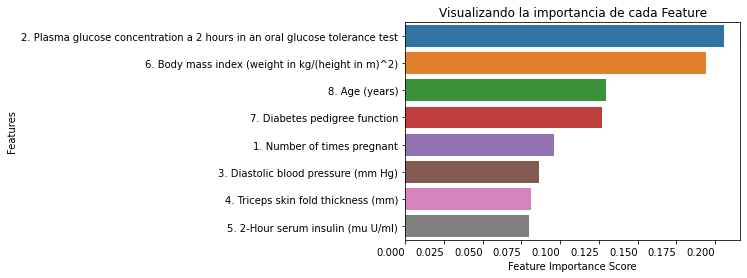

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y=feature_importances_df.feature, x=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=0, horizontalalignment = "right", fontweight="light");

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**

## Probando con mas estimadores

Vamos a probar con diferentes cantidades de estimadores para luego graficar el accuracy de cada uno de ellos para ver el comportamiento

In [26]:
# listas para almacenar los resultados
n_estimators = list()
accuracy_score_train = list()
accuracy_score_test = list()

# Vamos agregando de 5 en 5 estimadores inciando en 10 y terminando en 300 
for n in range(10, 301, 5):
  
  # guardamos la cantidad de estimadores
  n_estimators.append(n)
  # creamos el modelo con los estimadores dados
  rf = RandomForestClassifier(n_estimators=n, random_state = 00000)
  # entrenamos el modelo
  rf.fit(X_train, y_train)

  # generamos las predicciones
  y_train_pred = rf.predict(X_train)
  y_test_pred = rf.predict(X_test)

  # guardamos los valores de accuracy del respectivo modelo
  accuracy_score_train.append(accuracy_score(y_train, y_train_pred))
  accuracy_score_test.append(accuracy_score(y_test, y_test_pred))



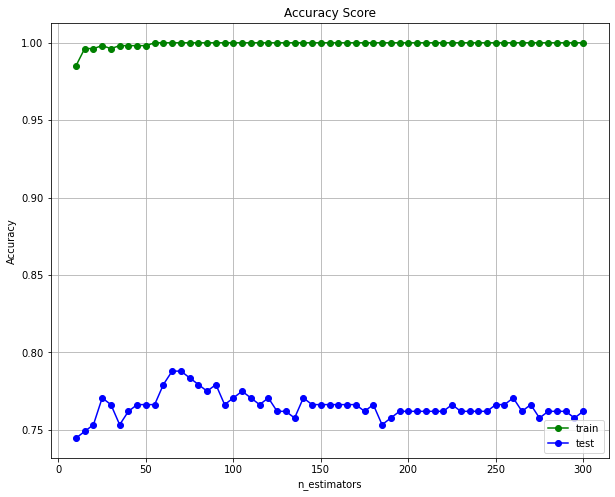

In [29]:
# Grafica de estimadores vs Accuracy
plt.figure(figsize=(10, 8))
plt.plot(n_estimators, accuracy_score_train, 'g', marker='o', label='train')
plt.plot(n_estimators, accuracy_score_test, 'b', marker='o', label='test')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Score')
plt.legend()
plt.grid();

El accuracy en train no cambia a partir de 50 estimadores, mientras que el accuracy en test muestra su valor mas alto alrededor de 60 estimadores.